In [ ]:
#import required libraries
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
import plotly.graph_objects as go

%matplotlib inline

In [ ]:
#import the data

df = pd.read_csv('/content/Unicorn_Companies.csv', encoding ='latin-1')
df.head(100)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
95,Gong,$7B,2020-08-12,Artificial intelligence,Palo Alto,United States,North America,2015,$583M,"Norwest Venture Partners, Next World Capital, ..."
96,TripActions,$7B,2018-11-08,Travel,Palo Alto,United States,North America,2015,$912M,"Andreessen Horowitz, Lightspeed Venture Partne..."
97,1Password,$7B,2021-07-08,Cybersecurity,Toronto,Canada,North America,2005,$920M,"Slack Fund, Accel, Skip Capital"
98,Automation Anywhere,$7B,2018-07-02,Artificial intelligence,San Jose,United States,North America,2003,$849M,"General Atlantic, Goldman Sachs, New Enterpris..."


In [ ]:
# Clean the Valuation column
df['Valuation'] = df['Valuation'].str.replace('$', '')  # Remove the '$' symbol
df['Valuation'] = df['Valuation'].str.replace('B', '')  # Remove the 'B' character
df['Valuation'] = df['Valuation'].astype(float)  # Convert to float

# Clean the Date Joined column
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')  # Convert to datetime format

# Drop rows with missing or invalid dates
df = df.dropna(subset=['Date Joined'])

# Print the cleaned dataframe
print(df)

In [ ]:
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,40.0,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,40.0,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,39.0,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,38.0,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,38.0,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [ ]:
import pandas as pd

# Read the dataset
df = pd.DataFrame({
    'Company': ['Bytedance', 'SpaceX', 'SHEIN', 'Stripe', 'Klarna', 'Canva', 'Checkout.com', 'Instacart', 'JUUL Labs', 'Databricks'],
    'Valuation': [180.0, 100.0, 100.0, 95.0, 46.0, 40.0, 40.0, 39.0, 38.0, 38.0],
    'Date Joined': ['2017-04-07', '2012-12-01', '2018-07-03', '2014-01-23', '2011-12-12', '2018-01-08', '2019-05-02', '2014-12-30', '2017-12-20', '2019-02-05'],
    'Funding': ['$8B', '$7B', '$2B', '$2B', '$4B', '$572M', '$2B', '$3B', '$14B', '$3B']
})

# Clean the 'Valuation' column
df['Valuation'] = df['Valuation'].astype(float)

# Clean the 'Funding' column
df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)

# Calculate the ROI for each company
df['ROI'] = (df['Valuation'] - df['Funding']) / df['Funding']

# Sort the companies based on ROI in descending order
df = df.sort_values('ROI', ascending=False)

# Print the companies with their corresponding ROI
for index, row in df.iterrows():
    print(row['Company'], ":", row['ROI'])


SHEIN : 49.0
Stripe : 46.5
Bytedance : 21.5
Checkout.com : 19.0
SpaceX : 13.285714285714286
Instacart : 12.0
Databricks : 11.666666666666666
Klarna : 10.5
JUUL Labs : 1.7142857142857142
Canva : -0.9300699300699301


<ipython-input-9-09d9795208a7>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)


<ipython-input-14-11c731afda3b>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)


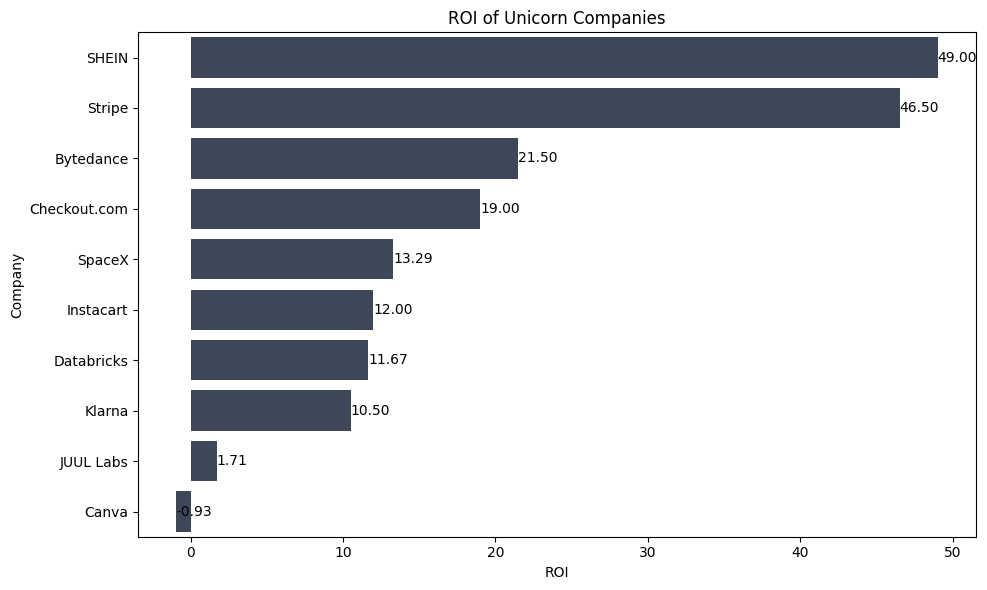

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.DataFrame({
    'Company': ['Bytedance', 'SpaceX', 'SHEIN', 'Stripe', 'Klarna', 'Canva', 'Checkout.com', 'Instacart', 'JUUL Labs', 'Databricks'],
    'Valuation': [180.0, 100.0, 100.0, 95.0, 46.0, 40.0, 40.0, 39.0, 38.0, 38.0],
    'Date Joined': ['2017-04-07', '2012-12-01', '2018-07-03', '2014-01-23', '2011-12-12', '2018-01-08', '2019-05-02', '2014-12-30', '2017-12-20', '2019-02-05'],
    'Funding': ['$8B', '$7B', '$2B', '$2B', '$4B', '$572M', '$2B', '$3B', '$14B', '$3B']
})

# Clean the 'Valuation' column
df['Valuation'] = df['Valuation'].astype(float)

# Clean the 'Funding' column
df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)

# Calculate the ROI for each company
df['ROI'] = (df['Valuation'] - df['Funding']) / df['Funding']

# Sort the companies based on ROI in descending order
df = df.sort_values('ROI', ascending=False)

# Create a bar chart of ROI
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='ROI', y='Company', color='#3A465C')

# Add labels and title
plt.xlabel('ROI')
plt.ylabel('Company')
plt.title('ROI of Unicorn Companies')

# Add annotations
for i, roi in enumerate(df['ROI']):
    ax.text(roi, i, f'{roi:.2f}', va='center')

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Read the dataset
df = pd.DataFrame({
    'Company': ['Bytedance', 'SpaceX', 'SHEIN', 'Stripe', 'Klarna', 'Canva', 'Checkout.com', 'Instacart', 'JUUL Labs', 'Databricks'],
    'Valuation': [180.0, 100.0, 100.0, 95.0, 46.0, 40.0, 40.0, 39.0, 38.0, 38.0],
    'Date Joined': ['2017-04-07', '2012-12-01', '2018-07-03', '2014-01-23', '2011-12-12', '2018-01-08', '2019-05-02', '2014-12-30', '2017-12-20', '2019-02-05'],
    'Funding': ['$8B', '$7B', '$2B', '$2B', '$4B', '$572M', '$2B', '$3B', '$14B', '$3B']
})

# Clean the 'Valuation' and 'Funding' columns
df['Valuation'] = df['Valuation'].astype(float)
df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)

# Calculate the time difference from 'Date Joined' to reaching $1 billion valuation
df['Time to Unicorn'] = pd.to_datetime('today') - pd.to_datetime(df['Date Joined'])
df['Time to Unicorn'] = df['Time to Unicorn'].dt.days

# Calculate the average time to reach $1 billion valuation
average_time = df[df['Valuation'] >= 1.0]['Time to Unicorn'].mean()

print(f"Average time to reach $1 billion valuation: {average_time} days")


Average time to reach $1 billion valuation: 2579.1 days


<ipython-input-16-602819a5b931>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)


<ipython-input-20-4100338e052e>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)


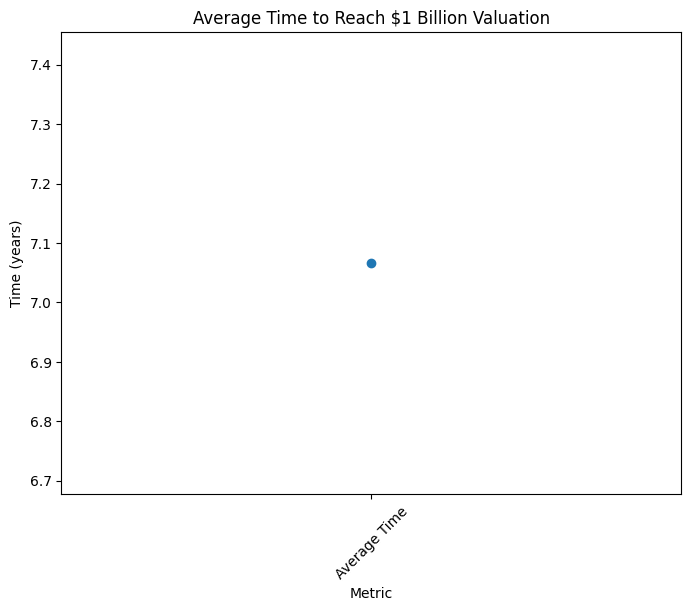

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.DataFrame({
    'Company': ['Bytedance', 'SpaceX', 'SHEIN', 'Stripe', 'Klarna', 'Canva', 'Checkout.com', 'Instacart', 'JUUL Labs', 'Databricks'],
    'Valuation': [180.0, 100.0, 100.0, 95.0, 46.0, 40.0, 40.0, 39.0, 38.0, 38.0],
    'Date Joined': ['2017-04-07', '2012-12-01', '2018-07-03', '2014-01-23', '2011-12-12', '2018-01-08', '2019-05-02', '2014-12-30', '2017-12-20', '2019-02-05'],
    'Funding': ['$8B', '$7B', '$2B', '$2B', '$4B', '$572M', '$2B', '$3B', '$14B', '$3B']
})

# Clean the 'Valuation' and 'Funding' columns
df['Valuation'] = df['Valuation'].astype(float)
df['Funding'] = df['Funding'].str.replace('$', '').str.replace('B', '').str.replace('M', '').astype(float)

# Calculate the time difference from 'Date Joined' to reaching $1 billion valuation in years
df['Time to Unicorn'] = pd.to_datetime('today') - pd.to_datetime(df['Date Joined'])
df['Time to Unicorn'] = df['Time to Unicorn'].dt.days / 365

# Calculate the average time to reach $1 billion valuation in years
average_time = df[df['Valuation'] >= 1.0]['Time to Unicorn'].mean()

# Create a line plot of average time to reach $1 billion valuation
plt.figure(figsize=(8, 6))
plt.plot('Average Time', average_time, marker='o')
plt.xlabel('Metric')
plt.ylabel('Time (years)')
plt.title('Average Time to Reach $1 Billion Valuation')
plt.xticks(rotation=45)
plt.show()


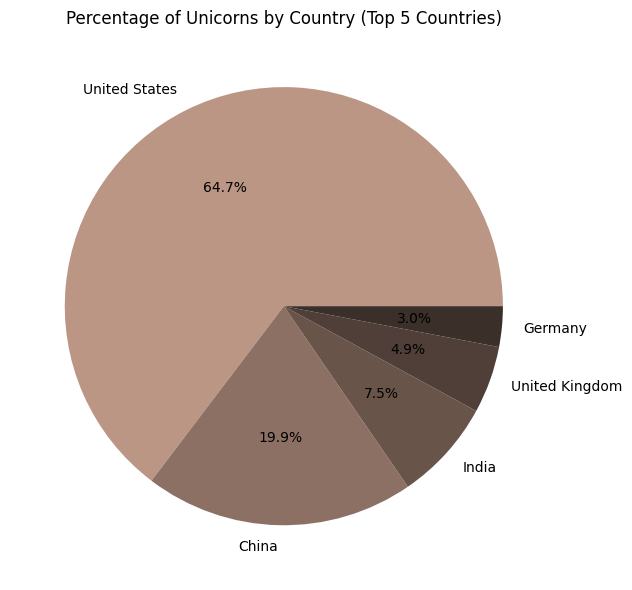

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the CSV file
df = pd.read_csv('/content/Unicorn_Companies.csv')

# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Get the top 5 countries with the highest number of unicorns
top_countries = country_counts.head(5)

# Generate a color palette based on the starting color #BB9684
start_color = '#BB9684'
num_colors = len(top_countries)
color_palette = mcolors.colorConverter.to_rgb(start_color)
colors = [mcolors.rgb2hex(color_palette)]

for _ in range(num_colors - 1):
    color_palette = [c - (c / (num_colors - 1)) for c in color_palette]
    colors.append(mcolors.rgb2hex(color_palette))

# Create a pie chart highlighting the top 5 countries with different colors
plt.figure(figsize=(10, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', colors=colors)

# Add labels and title
plt.title('Percentage of Unicorns by Country (Top 5 Countries)')

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/Unicorn_Companies.csv')

# Filter the dataset for fintech companies
fintech_df = df[df['Industry'] == 'Fintech']

# Calculate the total number of fintech companies
total_fintech = len(fintech_df)

print("Total number of fintech companies:", total_fintech)


Total number of fintech companies: 224


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/Unicorn_Companies.csv')

# Convert the "Industry" column to lowercase
df['Industry'] = df['Industry'].str.lower()

# Remove duplicates from the "Industry" column
df['Industry'] = df['Industry'].drop_duplicates()

# Count the occurrences of each industry category
industry_counts = df['Industry'].value_counts()

# Print the industry counts
print(industry_counts)

artificial intelligence                1
other                                  1
e-commerce & direct-to-consumer        1
fintech                                1
internet software & services           1
supply chain, logistics, & delivery    1
consumer & retail                      1
data management & analytics            1
edtech                                 1
health                                 1
hardware                               1
auto & transportation                  1
travel                                 1
cybersecurity                          1
mobile & telecommunications            1
Name: Industry, dtype: int64


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/Unicorn_Companies.csv')

# Convert the "Industry" column to lowercase
df['Industry'] = df['Industry'].str.lower()

# Count the occurrences of each industry category
industry_counts = df['Industry'].value_counts()

# Get the top 5 industries with the highest counts
top_industries = industry_counts.head(5)

# Print the top industries and their counts
print("Top Industries in Unicorn Companies:")
print(top_industries)

Top Industries in Unicorn Companies:
fintech                            224
internet software & services       205
e-commerce & direct-to-consumer    111
artificial intelligence             84
health                              74
Name: Industry, dtype: int64


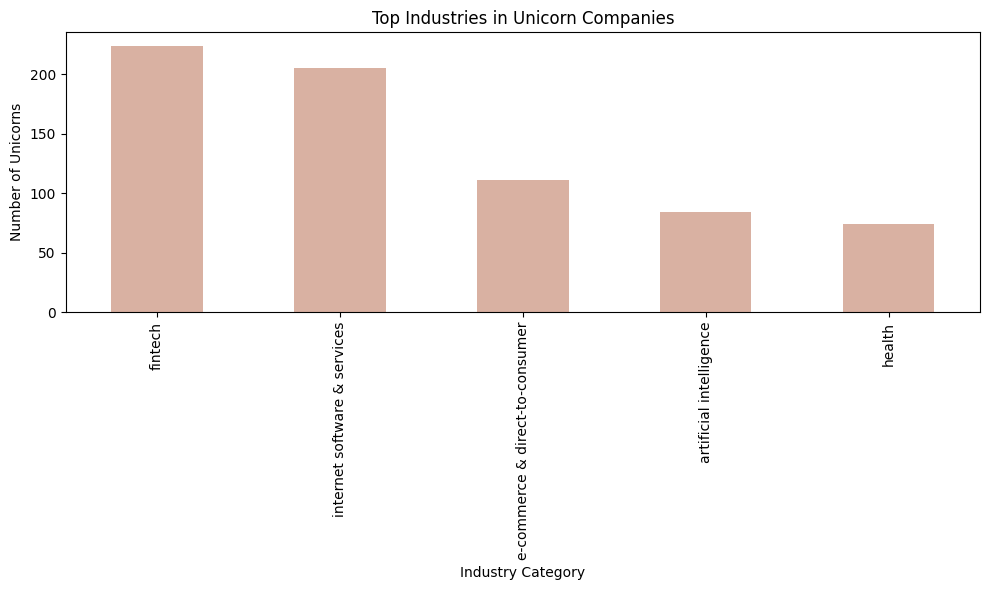

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/Unicorn_Companies.csv')

# Convert the "Industry" column to lowercase
df['Industry'] = df['Industry'].str.lower()

# Count the occurrences of each industry category
industry_counts = df['Industry'].value_counts()

# Get the top 5 industries with the highest counts
top_industries = industry_counts.head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_industries.plot(kind='bar', color='#D9B1A2')

# Add labels and title
plt.xlabel('Industry Category')
plt.ylabel('Number of Unicorns')
plt.title('Top Industries in Unicorn Companies')

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/Unicorn_Companies.csv')

# Drop rows with NaN values in 'Select Investors' column
df = df.dropna(subset=['Select Investors'])

# Split the investors string into individual investors
df['Select Investors'] = df['Select Investors'].str.split(',')

# Create a list to store all investors
all_investors = []
for investor_list in df['Select Investors']:
    if investor_list:
        all_investors.extend(investor_list)

# Count the occurrences of each investor
investor_counts = pd.Series(all_investors).value_counts()

# Display the top investors
top_investors = investor_counts.head(10)
print(top_investors)

 Tiger Global Management    39
 Accel                      32
 Sequoia Capital            30
Sequoia Capital China       30
Andreessen Horowitz         29
Accel                       28
 Andreessen Horowitz        24
 Insight Partners           24
Insight Partners            23
 General Catalyst           23
dtype: int64


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the dataset
df = pd.read_csv('/content/Unicorn_Companies.csv')

# Drop rows with NaN values in 'Select Investors' column
df = df.dropna(subset=['Select Investors'])

# Split the investors string into individual investors
df['Select Investors'] = df['Select Investors'].str.split(',')

# Create a list to store all investors
all_investors = []
for investor_list in df['Select Investors']:
    if investor_list:
        all_investors.extend(investor_list)

# Count the occurrences of each investor
investor_counts = pd.Series(all_investors).value_counts()

# Select the top 10 investors
top_investors = investor_counts.head(5)

# Create the tree diagram figure
fig = go.Figure(go.Treemap(
    labels=top_investors.index,
    parents=[''] * len(top_investors),
    values=top_investors.values,
    marker_colors=["#3A465C"] * len(top_investors),  # Set the color of the rectangles
    textinfo="label+value+percent entry",  # Display label, value, and percentage
    hovertemplate='Investor: %{label}<br>Investments: %{value}<br>Percentage: %{percentEntry}',
))

# Set the layout properties
fig.update_layout(
    title='Top 10 Investors',
    height=600,
    width=800,
    treemapcolorway=["#3A465C"],  # Set the color palette for the treemap
    font=dict(color="#3A465C"),  # Set the font color
)

# Display the tree diagram
fig.show()